In [14]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn
import mglearn

C:\app\Python38\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape (26, 2)


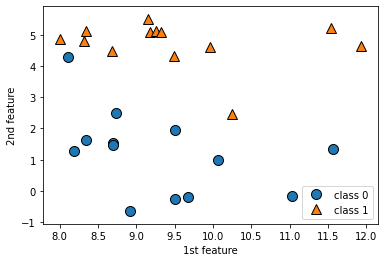

In [19]:
#데이터셋을 만듭니다.
X, y = mglearn.datasets.make_forge()
#산점도를 그립니다
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.legend(["class 0","class 1"], loc=4)
plt.xlabel("1st feature")
plt.ylabel("2nd feature")
print("X.shape", X.shape)


Text(0, 0.5, 'target')

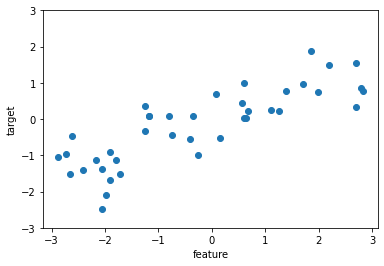

In [20]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())


cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [25]:
#유방암 데이터의 형태파악
print("유방암 데이터의 형태 : \n", cancer.data.shape)

유방암 데이터의 형태 : 
 (569, 30)


In [26]:
#데이터 포인트의 클래스별 샘플 갯수 파악
print("클래스별 샘플 개수:\n",
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [27]:
#feature_names 속성 확인을 통한 각 특성의 의미 파악
print("특성 이름:\n",cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [28]:
#cancer.DESCR을 통해 데이터에 관한 자세한  정보 확인 가능
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [30]:
#회귀분석용 데이터셋으로 보스턴  주택가격 데이터셋 사용
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:\n", boston.data.shape)

데이터의 형태:
 (506, 13)


In [31]:
#유도된 데이터셋 불러들이기
X, y = mglearn.datasets.load_extended_boston()
print("X.shape",X.shape)

X.shape (506, 104)


### k-최근접 이웃 먼저 살펴보기
knn은 가장 간단한 머신러닝 알고리즘
훈련  데이터 셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 최근접 이웃을 찾는다.

C:\app\Python38\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


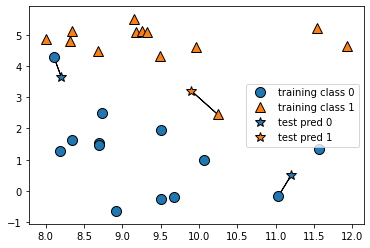

In [35]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\app\Python38\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


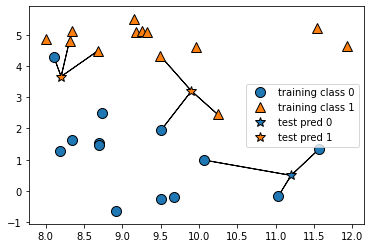

In [36]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

## k 최근접 이웃 알고리즘 적용 살펴보기
일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눔.

In [37]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state =0)

C:\app\Python38\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


KNeighborsClassifier 임포트하고 객체 생성, 매개변수로 이웃의 수 조정, 3으로

In [40]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [41]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
print("테스트 세트 예측: \n", clf.predict(X_test))

테스트 세트 예측: 
 [1 0 1 0 1 0 0]


In [52]:
print("테스트 세트 정확도: \n\t{:.2f}".format(clf.score(X_test,y_test)) )

테스트 세트 정확도: 
	0.86


* KNeighborsClassifier 분석


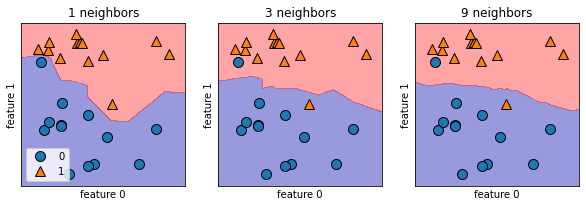

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    #fit 메소드 self 오브젝트를 리턴합니다.
    #그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5, ax= ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [56]:
#모델의 복잡도와 일반화 사이의 관계를 입증하기 위한 유방암 데이터셋 사용

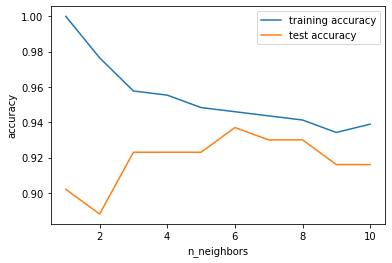

In [67]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state = 66)
training_accuracy= []
test_accuracy=[]
#1에서 10까지 n_neighbors 을 적용
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train ))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

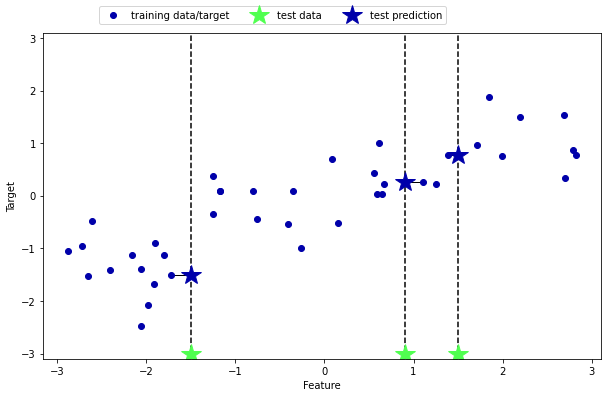

In [68]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [69]:
#이웃을 둘 이상 사용하여 회귀분석 가능, 이웃간의 평균이 예측이 된다.

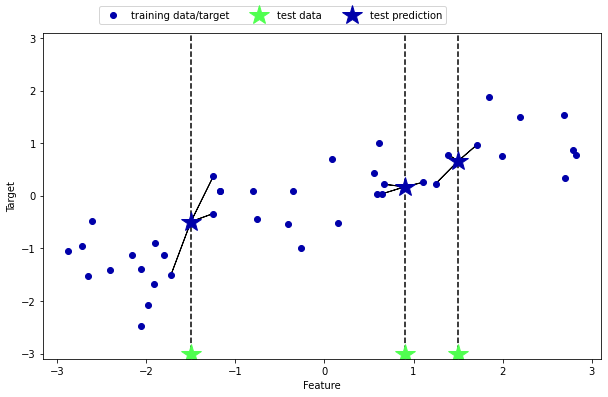

In [70]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [72]:
from sklearn.neighbors import KNeighborsRegressor

X, y= mglearn.datasets.make_wave(n_samples=40)

In [73]:
#wave 데이터셋을 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#이웃의 수를 3으로 하여 모델의 객체 생성
reg = KNeighborsRegressor(n_neighbors=3)

#훈련 데이터와 타겟을 사용하여 모델을 학습시킵니다.
reg.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=3)

In [74]:
#테스트 데이터에 대해서 예측
print("테스트 세트 예측: \n", reg.predict(X_test))

테스트 세트 예측: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [75]:
#모델 평가
print("테스트 세트 R^2L {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2L 0.83


### KNeighborsRegressor 분석

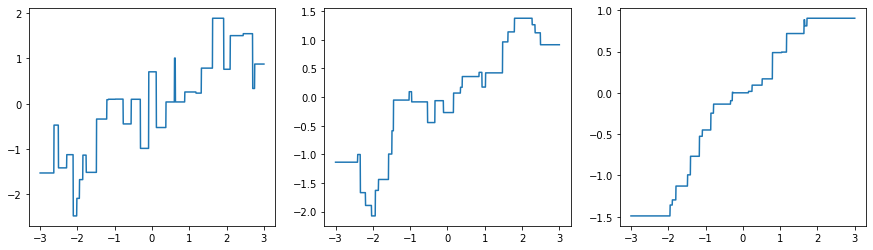

In [77]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
# -3과 3 사이에 1,000개의 데이터 포인트 생성
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))